<a href="https://colab.research.google.com/github/CanteroAlann/machine-learning-projects/blob/main/TrabajoPractico3Parte1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import  CountVectorizer
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

In [ ]:
train_df=pd.read_parquet('/content/drive/MyDrive/tp3 orga/train')

In [ ]:
train_df['popular'] = train_df['popular'].transform(lambda x : int(x))

In [ ]:
test_df = pd.read_parquet('/content/drive/MyDrive/tp3 orga/test')

In [ ]:
test_df['popular'] = test_df['popular'].transform(lambda x : int(x))

In [ ]:
test_df['timedelta'].value_counts()

In [ ]:
#dividimos el dataset usando la siguiente condicion 
mask_train = train_df['timedelta'] > 120
X_train = train_df[mask_train]
X_valid = train_df[~mask_train]
y_train = X_train[X_train.columns[-2]]
y_valid = X_valid[X_valid.columns[-2]]

In [ ]:
X_train.drop(columns=['popular','shares','timedelta','url'],inplace=True)
X_valid.drop(columns=['popular','shares','timedelta','url'],inplace=True)

In [ ]:
#calculo la mediana para los valores numericos
title_subjectivity_median = X_train['title_subjectivity'].median()
abs_title_median = X_train['abs_title_subjectivity'].median()
max_positive_polarity_median = X_train['max_positive_polarity'].median()
n_tokens_title_median=X_train['n_tokens_title'].median()
n_tokens_content_median=X_train['n_tokens_content'].median()
n_unique_tokens_median=X_train['n_unique_tokens'].median()
num_videos_media=X_train['num_videos'].median()
n_non_stop_words_median=X_train['n_non_stop_words'].median()
n_non_stop_unique_tokens_median =X_train['n_non_stop_unique_tokens'].median()
num_hrefs_median=X_train['num_hrefs'].median()
num_self_hrefs_median = X_train['num_self_hrefs'].median()
num_imgs_median=X_train['num_imgs'].median()
num_keywords_median=X_train['num_keywords'].median()
kw_min_min_median=X_train['kw_min_min'].median()
kw_max_min_median=X_train['kw_max_min'].median()
kw_avg_min_median=X_train['kw_avg_min'].median()
kw_min_max_median=X_train['kw_min_max'].median()
kw_max_max_median=X_train['kw_max_max'].median()
kw_min_avg_median=X_train['kw_min_avg'].median()
self_reference_avg_sharess_median=X_train['self_reference_avg_sharess'].median()
LDA_00_median=X_train['LDA_00'].median()
LDA_01_median=X_train['LDA_01'].median()
LDA_02_median=X_train['LDA_02'].median()
LDA_03_median=X_train['LDA_03'].median()
global_sentiment_polarity_median=X_train['global_sentiment_polarity'].median()
global_rate_positive_words_median=X_train['global_rate_positive_words'].median()
global_rate_negative_words_median=X_train['global_rate_negative_words'].median()
rate_positive_words_median=X_train['rate_positive_words'].median()
rate_negative_words_median=X_train['rate_negative_words'].median()
avg_positive_polarity_median=X_train['avg_positive_polarity'].median()
avg_negative_polarity_median=X_train['avg_negative_polarity'].median()
max_negative_polarity_median=X_train['max_negative_polarity'].median()
min_negative_polarity_median=X_train['min_negative_polarity'].median()
abs_title_sentiment_polarity_median=X_train['abs_title_sentiment_polarity'].median()

In [ ]:
# reemplazamos en train 
X_train['title_subjectivity'].fillna(value=title_subjectivity_median,inplace=True)
X_train['abs_title_subjectivity'].fillna(value=abs_title_median,inplace=True)
X_train['max_positive_polarity'].fillna(value=max_positive_polarity_median,inplace=True)
X_train['content'].fillna(value="",inplace=True)
X_train['n_tokens_title'].fillna(value=n_tokens_title_median,inplace=True)
X_train['n_tokens_content'].fillna(value=n_tokens_content_median,inplace=True)
X_train['n_unique_tokens'].fillna(value=n_unique_tokens_median,inplace=True)
X_train['num_videos'].fillna(value=num_videos_media,inplace=True)
X_train['n_non_stop_words'].fillna(value=n_non_stop_words_median,inplace=True)
X_train['n_non_stop_unique_tokens'].fillna(value=n_non_stop_unique_tokens_median,inplace=True)
X_train['num_hrefs'].fillna(value=num_hrefs_median,inplace=True)
X_train['num_self_hrefs'].fillna(value=num_self_hrefs_median,inplace=True)
X_train['num_imgs'].fillna(value=num_imgs_median,inplace=True)
X_train['num_keywords'].fillna(value=num_keywords_median,inplace=True)
X_train['kw_min_min'].fillna(value=kw_min_min_median,inplace=True)
X_train['kw_max_min'].fillna(value=kw_max_min_median,inplace=True)
X_train['kw_avg_min'].fillna(value=kw_avg_min_median,inplace=True)
X_train['kw_min_max'].fillna(value=kw_min_max_median,inplace=True)
X_train['kw_max_max'].fillna(value=kw_max_max_median,inplace=True)
X_train['kw_min_avg'].fillna(value=kw_min_avg_median,inplace=True)
X_train['self_reference_avg_sharess'].fillna(value=self_reference_avg_sharess_median,inplace=True)
X_train['LDA_00'].fillna(value=LDA_00_median,inplace=True)
X_train['LDA_01'].fillna(value=LDA_01_median,inplace=True)
X_train['LDA_02'].fillna(value=LDA_02_median,inplace=True)
X_train['LDA_03'].fillna(value=LDA_03_median,inplace=True)
X_train['global_sentiment_polarity'].fillna(value=global_sentiment_polarity_median,inplace=True)
X_train['global_rate_positive_words'].fillna(value=global_rate_positive_words_median,inplace=True)
X_train['global_rate_negative_words'].fillna(value=global_rate_negative_words_median,inplace=True)
X_train['rate_positive_words'].fillna(value=rate_positive_words_median,inplace=True)
X_train['rate_negative_words'].fillna(value=rate_negative_words_median,inplace=True)
X_train['avg_positive_polarity'].fillna(value=avg_positive_polarity_median,inplace=True)
X_train['avg_negative_polarity'].fillna(value=avg_negative_polarity_median,inplace=True)
X_train['max_negative_polarity'].fillna(value=max_negative_polarity_median,inplace=True)
X_train['min_negative_polarity'].fillna(value=min_negative_polarity_median,inplace=True)
X_train['abs_title_sentiment_polarity'].fillna(value=abs_title_sentiment_polarity_median,inplace=True)
#Reemplazamos en valid
X_valid['n_unique_tokens'].fillna(value=n_unique_tokens_median,inplace=True)
X_valid['LDA_01'].fillna(value=LDA_01_median,inplace=True)
X_valid['global_rate_negative_words'].fillna(value=global_rate_negative_words_median,inplace=True)
X_valid['max_positive_polarity'].fillna(value=max_positive_polarity_median,inplace=True)
X_valid['max_negative_polarity'].fillna(value=max_negative_polarity_median,inplace=True) 
#Reemplazamos en test 
test_df['LDA_00'].fillna(value=LDA_00_median,inplace=True)
test_df['LDA_01'].fillna(value=LDA_01_median,inplace=True)
test_df['LDA_03'].fillna(value=LDA_01_median,inplace=True)
test_df['global_rate_positive_words'].fillna(value=global_rate_positive_words_median,inplace=True)
test_df['rate_negative_words'].fillna(value=rate_negative_words_median,inplace=True)
test_df['content'].fillna(value="",inplace=True)


In [ ]:
# imputacion de nulos para variables nominales 
def nominal_nulls(column,columns_names,dataset):
  nulls_index = dataset.index[dataset[column].isnull()].to_list()
  for index in nulls_index:
    for name in columns_names:
      if dataset.loc[index,name]:
        dataset.at[index,column] = 0.0
      else:
        dataset.at[index,column] = 1.0

In [ ]:
channels_list = list(["data_channel_is_lifestyle","data_channel_is_entertainment","data_channel_is_bus","data_channel_is_socmed","data_channel_is_tech","data_channel_is_world"])
days_list = list(['weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday','weekday_is_thursday','weekday_is_friday','weekday_is_saturday','weekday_is_sunday'])

In [ ]:
nominal_nulls('data_channel_is_bus',channels_list,X_train)
nominal_nulls('data_channel_is_socmed',channels_list,X_train)
nominal_nulls('data_channel_is_tech',channels_list,X_train)
nominal_nulls('weekday_is_monday',days_list,X_train)
nominal_nulls('weekday_is_tuesday',days_list,X_train)
nominal_nulls('weekday_is_wednesday',days_list,X_train)
nominal_nulls('weekday_is_friday',days_list,X_train)
nominal_nulls('weekday_is_saturday',days_list,X_train)
nominal_nulls('weekday_is_thursday',days_list,test_df)

In [ ]:
#dividimos el set de test
X_test = test_df.drop(columns=['popular','shares','timedelta','url'])
y_test = test_df[test_df.columns[-2]]

In [ ]:
ohe_surprise1 = OneHotEncoder(drop='first')
encoded_surprise1 = ohe_surprise1.fit_transform(X_train[['surprise1']]).todense().astype(int)
encoded_surprise1_valid = ohe_surprise1.transform(X_valid[['surprise1']]).todense().astype(int)
encoded_surprise1_test = ohe_surprise1.transform(X_test[['surprise1']]).todense().astype(int)

In [ ]:
count_vectorizer = CountVectorizer(lowercase=True,max_features=100,stop_words='english')
encoded_content = count_vectorizer.fit_transform(X_train['content']).toarray()
encoded_content_valid = count_vectorizer.transform(X_valid['content']).toarray()
encoded_content_test = count_vectorizer.transform(X_test['content']).toarray()

In [ ]:
X_train.content=encoded_content
X_valid.content=encoded_content_valid
X_test.content=encoded_content_test

In [ ]:
X_train.surprise1 = encoded_surprise1
X_valid.surprise1 = encoded_surprise1_valid
X_test.surprise1 = encoded_surprise1_test

In [ ]:
bin_enc_surprise2 = LabelBinarizer()
encoded_surprise2 = bin_enc_surprise2.fit_transform(X_train['surprise2'])
encoded_valid_surprise2 = bin_enc_surprise2.transform(X_valid['surprise2'])
encoded_test_surprise2 = bin_enc_surprise2.transform(X_test['surprise2'])

In [ ]:
X_train.surprise2 = encoded_surprise2
X_valid.surprise2 = encoded_valid_surprise2
X_test.surprise2 = encoded_test_surprise2

Busco hiper parametros para el modelo usando randon search 

In [ ]:
new_model=LogisticRegression(random_state=42)

params = { 'penalty' : ['l2','none'],
           'C' : (1,2,4,5),
           'solver'   : ['newton-cg','sag','lbfgs','saga'],
           'max_iter' : (300,400,500)          
}

randm_src = RandomizedSearchCV(estimator=new_model, param_distributions = params,cv=2,n_iter=10,n_jobs=-1,scoring='roc_auc',random_state=42)

In [ ]:
randm_src.fit(X_train, y_train)

In [ ]:
new_preds= randm_src.predict(X_valid)

In [ ]:
mean_absolute_error(y_valid, new_preds)

0.1705665024630542

In [ ]:
proba_preds_valid = randm_src.predict_proba(X_valid)[:,1]
roc_auc_score(y_valid, proba_preds_valid)

0.7148445723574636

Evaluando el modelo en test 

In [ ]:
test_preds= randm_src.predict(X_test)
mean_absolute_error(y_test, test_preds)

0.16302436573725196

In [ ]:
proba_preds_test = randm_src.predict_proba(X_test)[:,1]
roc_auc_score(y_test, proba_preds_test)

0.7083017985879345

In [ ]:
urls = test_df[test_df.columns[0]]
probas = pd.Series(proba_preds_test) 

In [ ]:
entrega=pd.DataFrame(zip(urls,probas),columns=['url','proba'])

In [ ]:
entrega.to_csv('parte2.csv')

Grafico las columnas mas importantes

In [ ]:
mod=randm_src.best_estimator_.coef_

In [ ]:
odds = np.exp(mod[0])
importance=pd.DataFrame(odds, 
             X_train.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

In [ ]:
for_plot=importance.head(10)

In [ ]:
for_plot.reset_index(inplace=True)

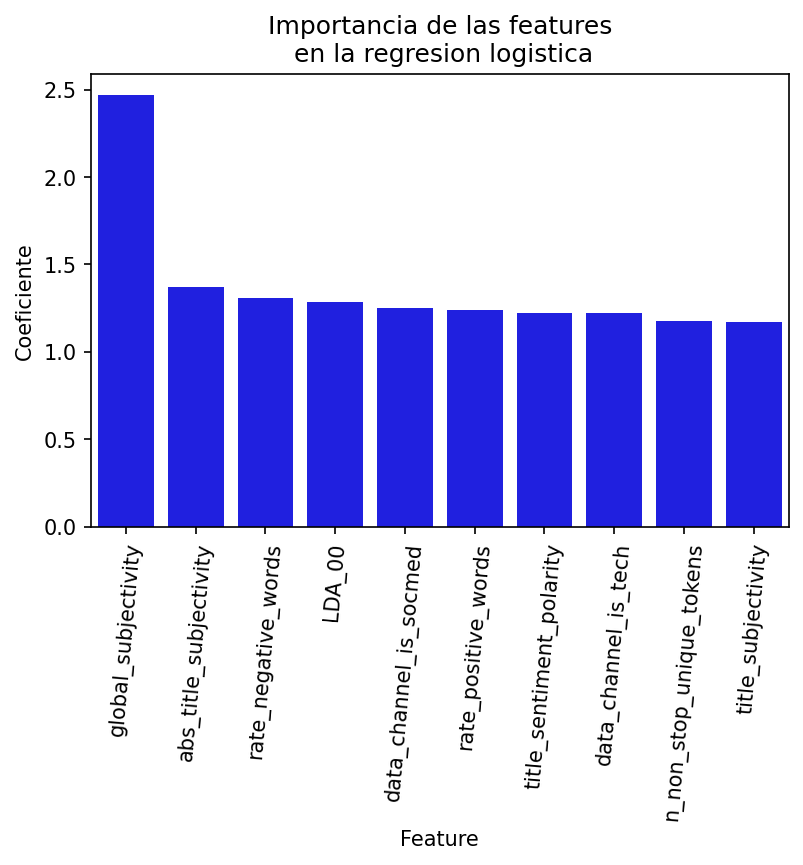

In [ ]:
plt.figure(dpi=150)
fig = sns.barplot(data=for_plot , x='index',y='coef',color='blue')
plt.xticks(rotation=85)
plt.title('Importancia de las features\n en la regresion logistica')
plt.xlabel("Feature")
plt.ylabel("Coeficiente")
plt.savefig('visuParte2.jpg', dpi=200, bbox_inches='tight', pad_inches=0.5)